In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file_id = r'C:\Users\Omar_Atif\Desktop\jupyter python\business_study_data.csv'
url = file_id

In [8]:
data = pd.read_csv(url)
data.head()

,CustomerID,Age,Gender,Annual_Income,Spending_Score,Membership_Level,Region,Product_Category,Purchase_Frequency,Last_Purchase_Days,IsActive,Satisfaction_Score
0,1,56.0,Male,38794.0,66,Basic,South,Electronics,16,311,0,8
1,2,69.0,Female,50653.0,76,Gold,West,Groceries,10,12,0,7
2,3,46.0,Female,48977.0,91,Basic,West,Clothing,16,211,1,10
3,4,32.0,Male,53451.0,69,Basic,South,Clothing,5,244,1,1
4,5,60.0,Male,17133.0,37,Silver,South,Clothing,3,239,0,3


In [9]:
data.isna().sum()

CustomerID              0
Age                   250
Gender                250
Annual_Income         247
Spending_Score          0
Membership_Level      250
Region                  0
Product_Category        0
Purchase_Frequency      0
Last_Purchase_Days      0
IsActive                0
Satisfaction_Score      0
dtype: int64

In [27]:
#  dimensions of your DataFrame 
data.shape

(4750, 12)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          5000 non-null   int64  
 1   Age                 4750 non-null   float64
 2   Gender              4750 non-null   object 
 3   Annual_Income       4753 non-null   float64
 4   Spending_Score      5000 non-null   int64  
 5   Membership_Level    4750 non-null   object 
 6   Region              5000 non-null   object 
 7   Product_Category    5000 non-null   object 
 8   Purchase_Frequency  5000 non-null   int64  
 9   Last_Purchase_Days  5000 non-null   int64  
 10  IsActive            5000 non-null   int64  
 11  Satisfaction_Score  5000 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 468.9+ KB


In [12]:
data.isnull().mean()*100 # calculate percentage null value

CustomerID            0.00
Age                   5.00
Gender                5.00
Annual_Income         4.94
Spending_Score        0.00
Membership_Level      5.00
Region                0.00
Product_Category      0.00
Purchase_Frequency    0.00
Last_Purchase_Days    0.00
IsActive              0.00
Satisfaction_Score    0.00
dtype: float64

In [13]:
data['Age'] = data['Age'].fillna(data['Age'].median()) # nall --> median

In [14]:
data.isna().sum()

CustomerID              0
Age                     0
Gender                250
Annual_Income         247
Spending_Score          0
Membership_Level      250
Region                  0
Product_Category        0
Purchase_Frequency      0
Last_Purchase_Days      0
IsActive                0
Satisfaction_Score      0
dtype: int64

In [15]:
data.dropna(subset=['Gender'],inplace=True) # remove nall in Gender

In [16]:
data['Annual_Income'] = data['Annual_Income'].fillna(data['Annual_Income'].median()) # nan -> median

In [17]:
if data.duplicated().any():
    print("There are duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

print(data.duplicated())

There are no duplicate rows in the DataFrame.
0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 4750, dtype: bool


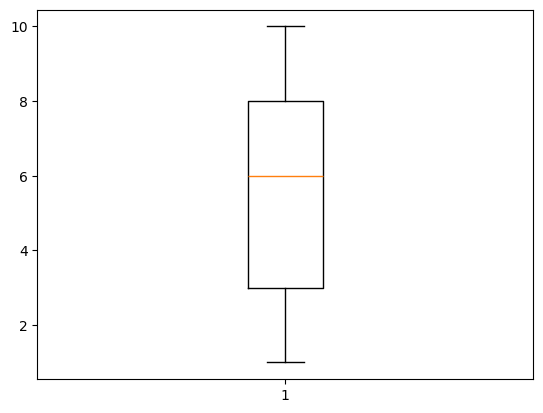

In [26]:
#show DataFrame using Matplotlib.
plt.boxplot(data['Satisfaction_Score'])
plt.show()

In [19]:
data[(data['Satisfaction_Score']>50)]

,CustomerID,Age,Gender,Annual_Income,Spending_Score,Membership_Level,Region,Product_Category,Purchase_Frequency,Last_Purchase_Days,IsActive,Satisfaction_Score


In [20]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding
#converts categorical variables in your DataFrame data into numeric
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("Original Data Shape:", data.shape)
print("Encoded Data Shape:", data_encoded.shape)
display(data_encoded.head())

Original Data Shape: (4750, 12)
Encoded Data Shape: (4750, 18)


,CustomerID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Last_Purchase_Days,IsActive,Satisfaction_Score,Gender_Male,Membership_Level_Gold,Membership_Level_Platinum,Membership_Level_Silver,Region_North,Region_South,Region_West,Product_Category_Electronics,Product_Category_Furniture,Product_Category_Groceries
0,1,56.0,38794.0,66,16,311,0,8,True,False,False,False,False,True,False,True,False,False
1,2,69.0,50653.0,76,10,12,0,7,False,True,False,False,False,False,True,False,False,True
2,3,46.0,48977.0,91,16,211,1,10,False,False,False,False,False,False,True,False,False,False
3,4,32.0,53451.0,69,5,244,1,1,True,False,False,False,False,True,False,False,False,False
4,5,60.0,17133.0,37,3,239,0,3,True,False,False,True,False,True,False,False,False,False


In [25]:
from sklearn.preprocessing import StandardScaler
#Selects all numerical columns (int-float)
numerical_cols = data_encoded.select_dtypes(include=np.number).columns.tolist()

if 'CustomerID' in numerical_cols:
    numerical_cols.remove('CustomerID')

scaler = StandardScaler()

data_scaled = data_encoded.copy()
#Applies scaling , Fits the scaler to the data
data_scaled[numerical_cols] = scaler.fit_transform(data_scaled[numerical_cols])

print("Scaled Data Head:")
display(data_scaled.head())

Scaled Data Head:


,CustomerID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Last_Purchase_Days,IsActive,Satisfaction_Score,Gender_Male,Membership_Level_Gold,Membership_Level_Platinum,Membership_Level_Silver,Region_North,Region_South,Region_West,Product_Category_Electronics,Product_Category_Furniture,Product_Category_Groceries
0,1,0.851192,-0.725643,0.518104,1.088733,1.242253,-1.026888,0.853984,True,False,False,False,False,True,False,True,False,False
1,2,1.746093,0.030491,0.857173,-0.022935,-1.598250,-1.026888,0.506688,False,True,False,False,False,False,True,False,False,True
2,3,0.162807,-0.076371,1.365775,1.088733,0.292252,0.973816,1.548578,False,False,False,False,False,False,True,False,False,False
3,4,-0.800933,0.208893,0.619825,-0.949326,0.605753,0.973816,-1.577093,True,False,False,False,False,True,False,False,False,False
4,5,1.126546,-2.106755,-0.465195,-1.319882,0.558253,-1.026888,-0.882499,True,False,False,True,False,True,False,False,False,False


In [24]:
data.describe()

,CustomerID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Last_Purchase_Days,IsActive,Satisfaction_Score
count,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000
mean,2492.817263,43.634947,50174.785465,50.719789,10.123789,180.236632,0.513263,5.541053
std,1445.299001,14.528274,15685.385083,29.495663,5.397862,105.274123,0.499877,2.879685
min,1.000000,18.000000,-3730.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1237.250000,32.000000,40144.000000,25.000000,5.000000,88.000000,0.000000,3.000000
50%,2485.500000,43.000000,49891.500000,51.000000,10.000000,180.000000,1.000000,6.000000
75%,3743.750000,56.000000,59749.250000,75.000000,15.000000,271.000000,1.000000,8.000000
max,5000.000000,69.000000,126154.197948,150.000000,19.000000,364.000000,1.000000,10.000000


In [48]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    5000 non-null   int64  
 1   Age                           4750 non-null   float64
 2   Annual_Income                 4753 non-null   float64
 3   Spending_Score                5000 non-null   float64
 4   Purchase_Frequency            5000 non-null   float64
 5   Last_Purchase_Days            5000 non-null   float64
 6   IsActive                      5000 non-null   float64
 7   Satisfaction_Score            5000 non-null   float64
 8   Gender_Male                   5000 non-null   bool   
 9   Membership_Level_Gold         5000 non-null   bool   
 10  Membership_Level_Platinum     5000 non-null   bool   
 11  Membership_Level_Silver       5000 non-null   bool   
 12  Region_North                  5000 non-null   bool   
 13  Reg